In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_auc_score, mean_squared_error, r2_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.graph_objects as go
from colorama import Fore

In [2]:
covid_data = pd.read_csv("Covid Dataset.csv")
covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [3]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [4]:
covid_data.describe().T

,count,unique,top,freq
Breathing Problem,5434,2,Yes,3620
Fever,5434,2,Yes,4273
Dry Cough,5434,2,Yes,4307
Sore throat,5434,2,Yes,3953
Running Nose,5434,2,Yes,2952
Asthma,5434,2,No,2920
Chronic Lung Disease,5434,2,No,2869
Headache,5434,2,Yes,2736
Heart Disease,5434,2,No,2911
Diabetes,5434,2,No,2846


In [5]:
covid_data.isnull().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

In [6]:
missing_values = covid_data.isnull().sum()
percent_missing = covid_data.isnull().sum() / covid_data.shape[0] * 100
missing_data = pd.DataFrame({
    'missing_values': missing_values,
    'percent_missing': percent_missing
})

missing_data

,missing_values,percent_missing
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


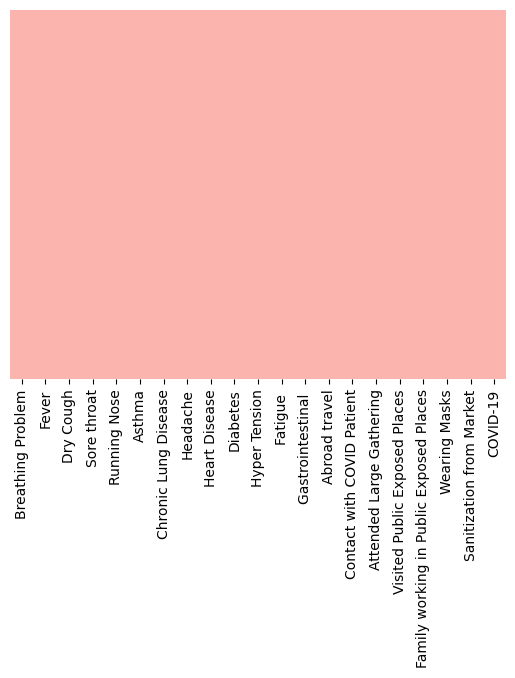

In [7]:
# Visualize missing values
sns.heatmap(covid_data.isnull(), yticklabels=False, cbar=False, cmap='Pastel1')
plt.show()

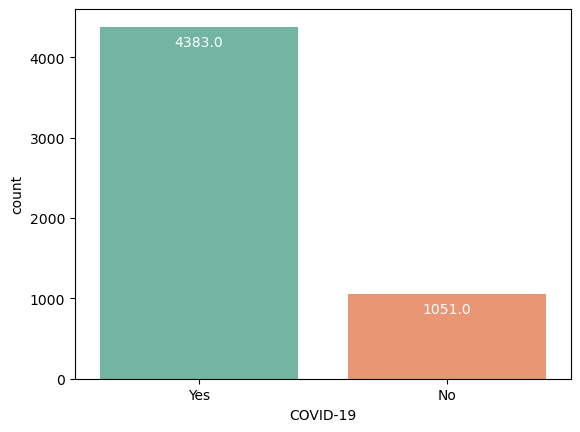

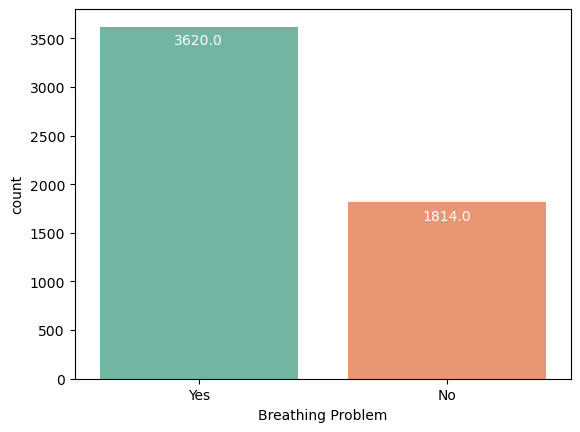

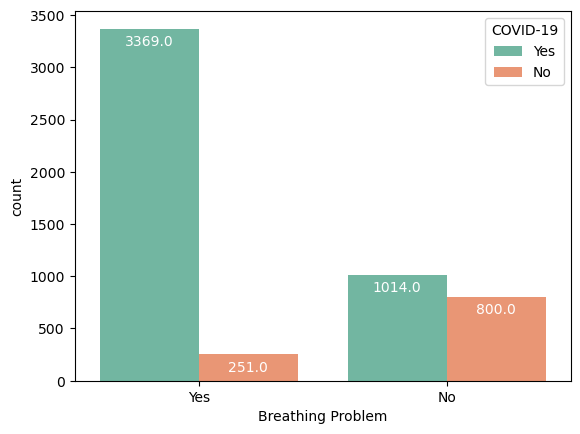

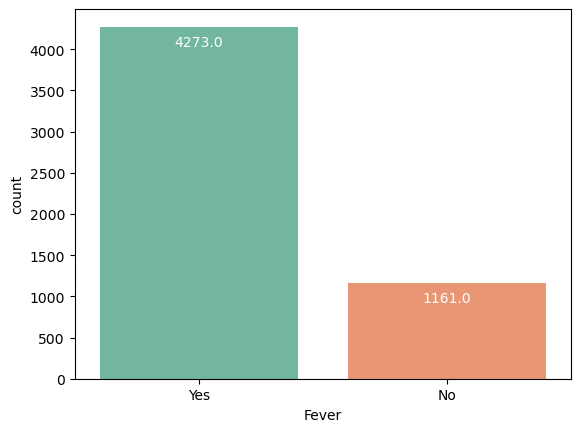

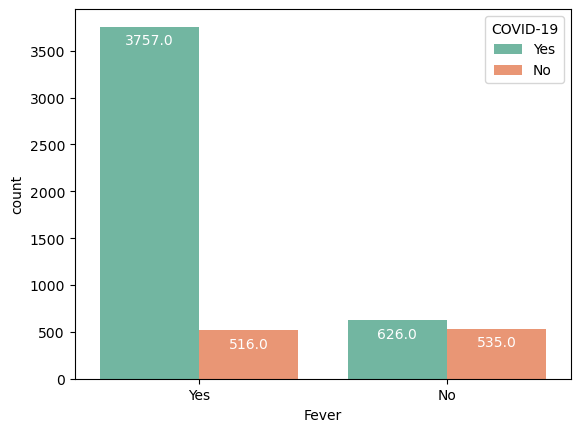

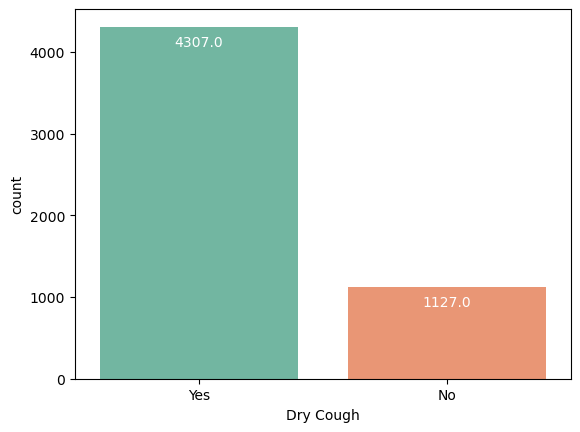

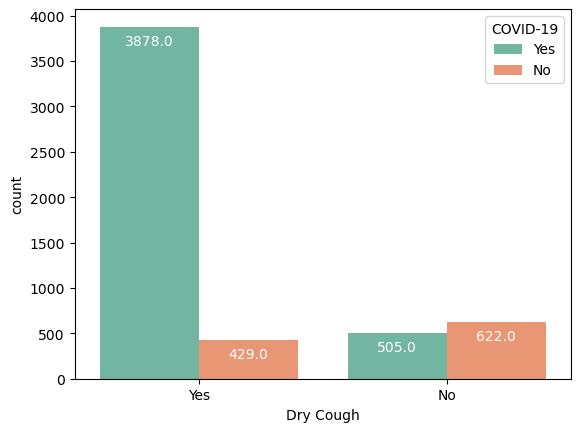

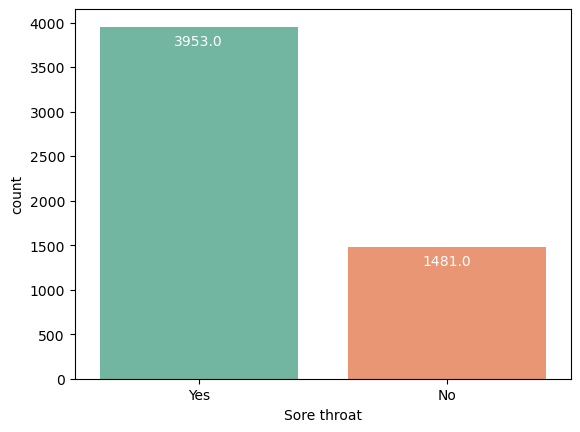

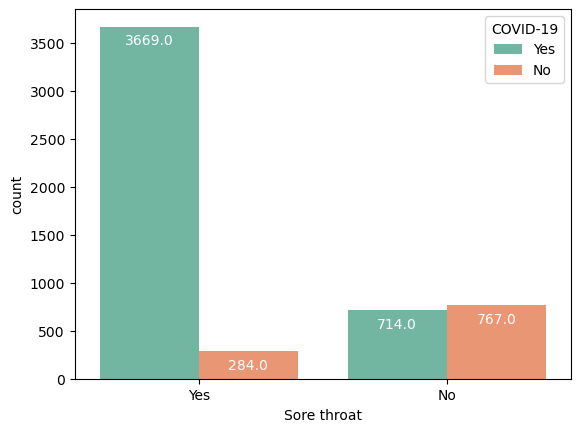

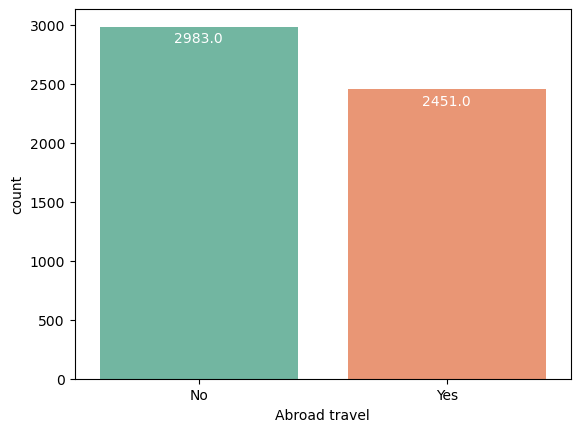

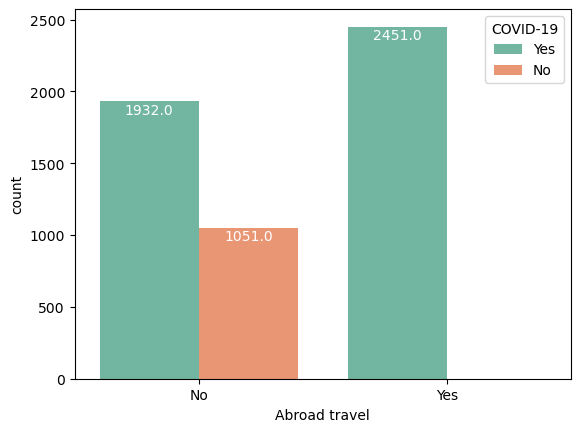

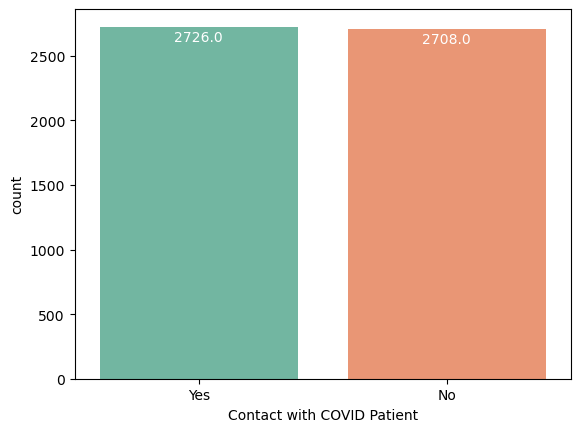

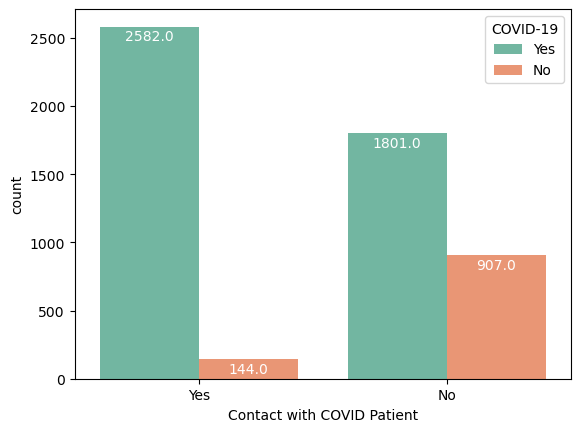

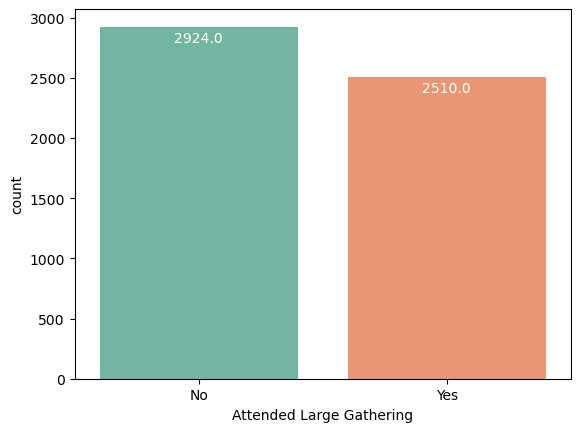

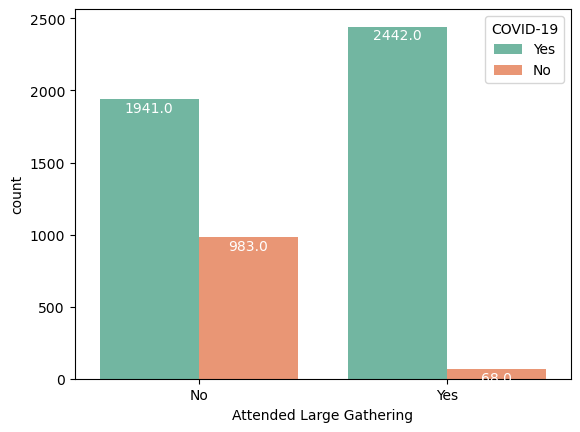

In [8]:
# Count plots for categorical features
categorical_features = [
    'COVID-19', 'Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
    'Abroad travel', 'Contact with COVID Patient', 'Attended Large Gathering'
]

for feature in categorical_features:
    ax = sns.countplot(x=feature, data=covid_data, palette="Set2")
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height() + 100), ha='center', va='top', color='white', size=10)
    plt.show()
    
    if feature != 'COVID-19':
        ax = sns.countplot(x=feature, hue='COVID-19', data=covid_data, palette="Set2")
        for p in ax.patches:
            ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.2, p.get_height() + 100), ha='center', va='top', color='white', size=10)
        plt.show()

In [9]:
# Encode categorical features
label_encoder = LabelEncoder()
for col in covid_data.columns:
    covid_data[col] = label_encoder.fit_transform(covid_data[col])

covid_data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1


In [10]:
# Drop features with less relevance
covid_data = covid_data.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)
covid_data.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'COVID-19'],
      dtype='object')

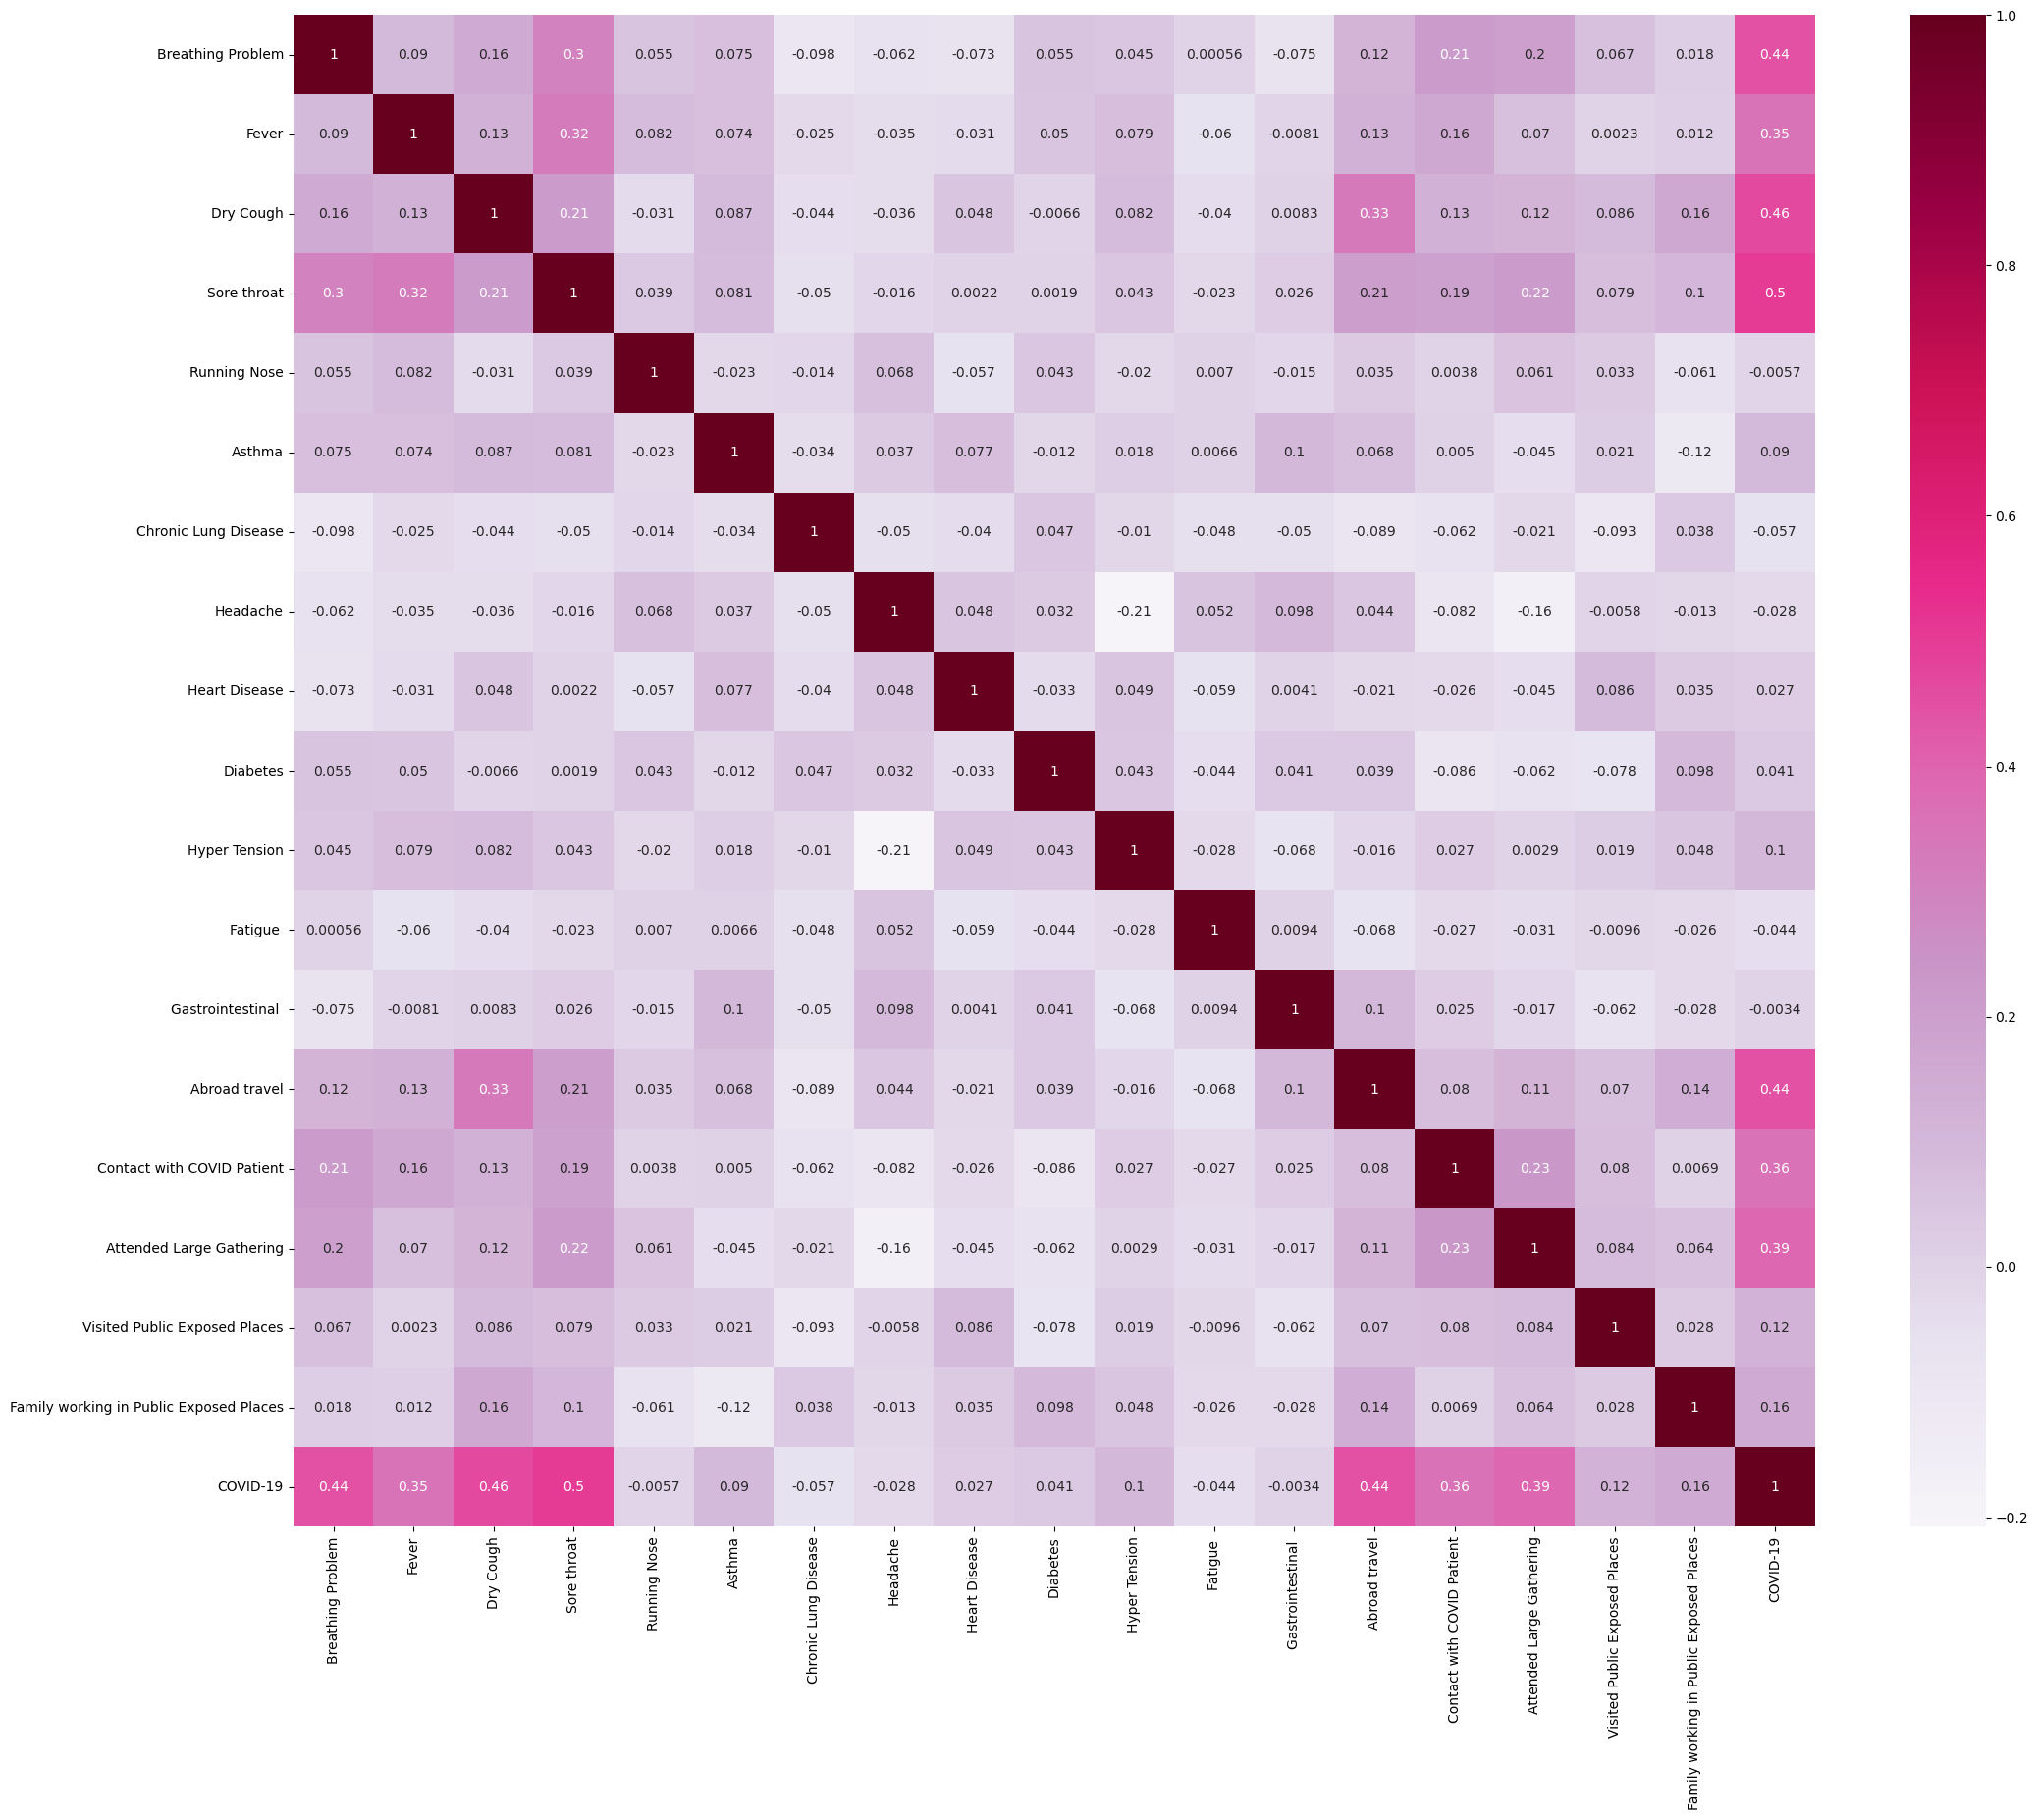

In [11]:
# Correlation heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(covid_data.corr(), annot=True, cmap="PuRd")
plt.show()

In [12]:
# Split data
X = covid_data.drop('COVID-19', axis=1)
y = covid_data['COVID-19']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [14]:
# Initialize dictionaries to store model metrics
accuracies = {}
algo_time = {}
r2_scores = {}
mean_squared_errors = {}
roc_auc_scores = {}

In [19]:
# Function to print performance metrics
def print_performance(yt, clf, clf_name):
    y_pred = clf.predict(X_test)
    roc_auc_scores[clf_name] = roc_auc_score(yt, y_pred) * 100
    mean_squared_errors[clf_name] = mean_squared_error(yt, y_pred) * 100
    r2_scores[clf_name] = r2_score(yt, y_pred) * 100
    accuracies[clf_name] = clf.score(X_train, y_train) * 100
    print(f'ROC_AUC value: {roc_auc_scores[clf_name]}%')
    print(f'Mean Squared Error: {mean_squared_errors[clf_name]}%')
    print(f'R2 score: {r2_scores[clf_name]}%')
    print(f'Accuracy Score: {accuracies[clf_name]}%')
    print(f'Classification Report:\n{classification_report(yt, y_pred)}')

    confusionmatrix = confusion_matrix(yt, y_pred)
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i, s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
    plt.xlabel('Predictions')
    plt.ylabel('Actuals')
    plt.title('Confusion Matrix')
    plt.show()

ROC_AUC value: 93.23107498945218%
Mean Squared Error: 3.035878564857406%
R2 score: 80.08627006861634%
Accuracy Score: 97.03243616287095%
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.92       204
           1       0.97      0.99      0.98       883

    accuracy                           0.97      1087
   macro avg       0.97      0.93      0.95      1087
weighted avg       0.97      0.97      0.97      1087



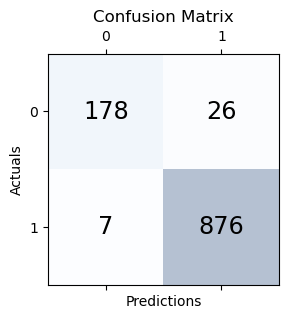

In [20]:
# Logistic Regression
start = time.time()
lr = LogisticRegression()
lr.fit(X_train, y_train)
end = time.time()
algo_time['LOGISTIC REGRESSION'] = end - start
print_performance(y_test, lr, 'LOGISTIC REGRESSION')

The best parameter: {'n_neighbors': 2}
The best score: 0.9809068423210718
ROC_AUC value: 97.47213154797593%
Mean Squared Error: 2.5758969641214353%
R2 score: 83.10350187640175%
Accuracy Score: 98.3666896710375%
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93       204
           1       0.99      0.97      0.98       883

    accuracy                           0.97      1087
   macro avg       0.95      0.97      0.96      1087
weighted avg       0.98      0.97      0.97      1087



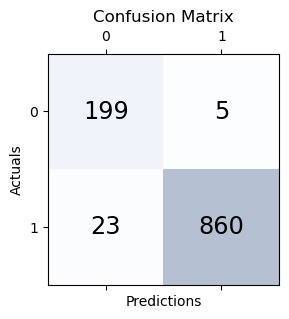

In [21]:
# K-Nearest Neighbors
start = time.time()
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
end = time.time()
algo_time['K-NEAREST NEIGHBOURS'] = end - start
print(f'The best parameter: {knn_cv.best_params_}')
print(f'The best score: {knn_cv.best_score_}')
print_performance(y_test, knn_cv, 'K-NEAREST NEIGHBOURS')

The best parameter: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
The best score: 98.13652897371796
ROC_AUC value: 96.94474052361602%
Mean Squared Error: 2.2079116835326587%
R2 score: 85.51728732263008%
Accuracy Score: 98.38969404186795%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       204
           1       0.99      0.98      0.99       883

    accuracy                           0.98      1087
   macro avg       0.96      0.97      0.96      1087
weighted avg       0.98      0.98      0.98      1087



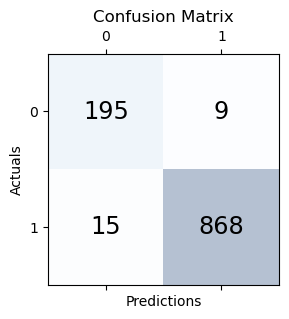

In [23]:
# Random Forest
rf_start = time.time()
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],  # Updated from 'auto' to 'sqrt'
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)
rf_end = time.time()
algo_time['RANDOM FOREST TREE'] = rf_end - rf_start
print(f'The best parameter: {CV_rfc.best_params_}')
print(f'The best score: {CV_rfc.best_score_ * 100}')
print_performance(y_test, CV_rfc, 'RANDOM FOREST TREE')


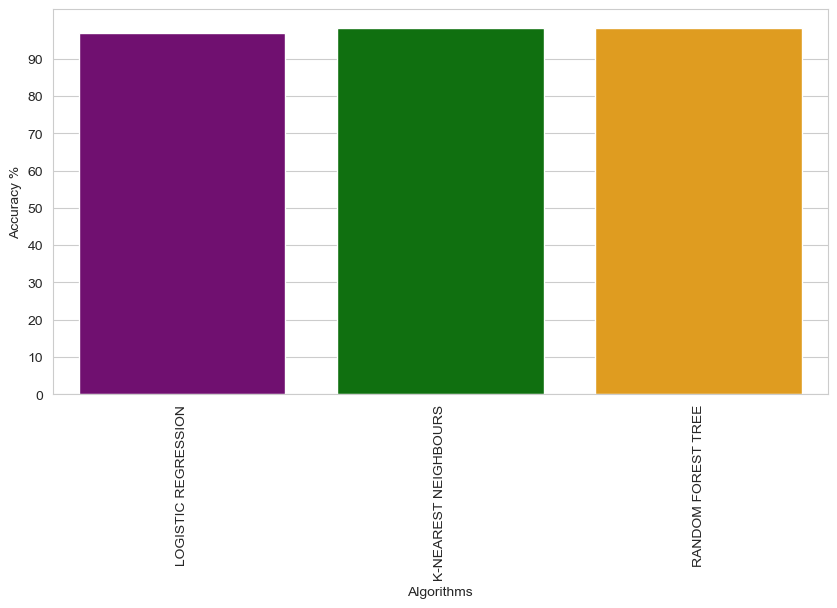

In [24]:
# Visualization of Model Performance
colors = ["purple", "green", "orange", "blue", "red", "yellow", "magenta"]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation=90)
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [25]:
fig = px.bar(x=list(accuracies.keys()), y=list(accuracies.values()), title="Accuracy Comparison", labels={"x": "Model", "y": "Accuracy"})
fig.show()

In [26]:
fig = px.bar(x=list(algo_time.keys()), y=list(algo_time.values()), title="Algorithm Time Comparison", labels={"x": "Model", "y": "Time (seconds)"})
fig.show()

In [28]:
fig = px.bar(x=list(r2_scores.keys()), y=list(r2_scores.values()), title="R2 Score Comparison", labels={"x": "Model", "y": "R2 Scores"})
fig.show()

In [29]:
fig = px.bar(x=list(mean_squared_errors.keys()), y=list(mean_squared_errors.values()), title="Mean Squared Error Comparison", labels={"x": "Model", "y": "Mean Squared Error"})
fig.show()

In [30]:
fig = px.bar(x=list(roc_auc_scores.keys()), y=list(roc_auc_scores.values()), title="ROC Score Comparison", labels={"x": "Model", "y": "ROC Scores"})
fig.show()

In [31]:
# Combined Bar Plot
Algos = list(roc_auc_scores.keys())
fig = go.Figure(data=[
    go.Bar(name='Accuracies', x=Algos, y=list(accuracies.values())),
    go.Bar(name='R2 scores', x=Algos, y=list(r2_scores.values())),
    go.Bar(name='Mean Squared Errors', x=Algos, y=list(mean_squared_errors.values())),
    go.Bar(name='ROC Auc Scores', x=Algos, y=list(roc_auc_scores.values()))
])
fig.update_layout(barmode='group', title="Model Performance Comparison", xaxis_title="Model", yaxis_title="Score")
fig.show()

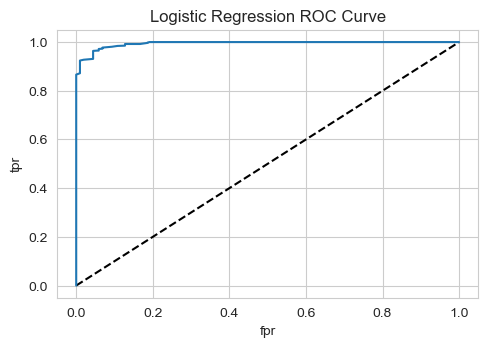

In [33]:
# Logistic Regression ROC Curve
plt.figure(figsize=(25, 16))
Y_predict1_proba = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict1_proba)
plt.subplot(441)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="Logistic Regression")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC Curve')
plt.show()

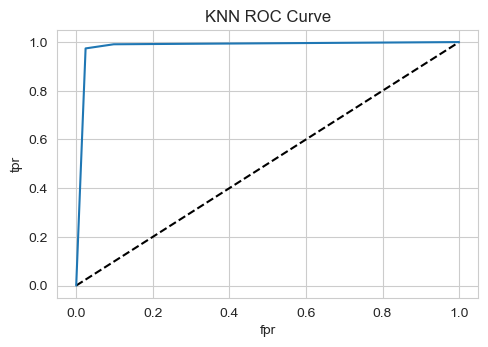

In [34]:
# KNN ROC Curve
plt.figure(figsize=(25, 16))
Y_predict2_proba = knn_cv.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict2_proba)
plt.subplot(442)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="KNN")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC Curve')
plt.show()

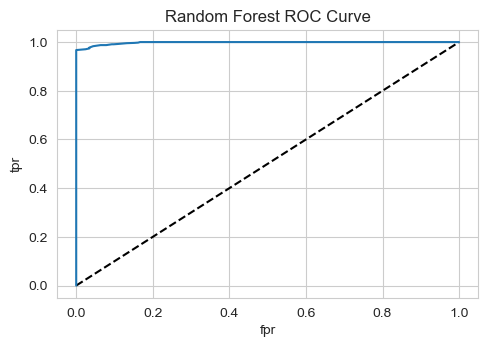

In [35]:
# Random Forest ROC Curve
plt.figure(figsize=(25, 16))
Y_predict3_proba = CV_rfc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, Y_predict3_proba)
plt.subplot(443)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="Random Forest")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Random Forest ROC Curve')
plt.show()

In [38]:
print("COVID PREDICTION BASED ON ML ALGORITHMS")
print("Enter 1 for Yes and 0 for No")
Breathing_Problem = int(input("Does the patient have breathing problem ? "))
Fever = int(input("Does the patient have fever ? "))
Dry_Cough = int(input("Does the patient have dry cough ? "))
Sore_throat = int(input("Does the patient have sore throat ? "))
Running_Nose = int(input("Does the patient have running nose ? ")) 
Asthma = int(input("Does the patient have any record of asthma ? ")) 
Chronic_Lung_Disease = int(input("Does the patient have any records of chronic lung disease ? ")) 
Headache = int(input("Is the patient having headche ? "))
Heart_Disease = int(input("Does the patient have any record of any heart disease ? "))
Diabetes = int(input("Does the patient have diabetes ? "))
Hyper_Tension = int(input("Does the patient have hyper tension ? ")) 
Fatigue = int(input("Does the patient experience fatigue ? "))
Gastrointestinal = int(input("Does the patient have any gastrointestinal disorders ? "))
Abroad_travel = int(input("Has the patient travelled abroad recently ? "))
Contact_with_COVID_Patient = int(input("Was the patient in contact with a covid patient recently ? "))
Attended_Large_Gathering = int(input("Did the patient attend any large gathering event recently ? "))
Visited_Public_Exposed_Places = int(input("Did the patient visit any public exposed places recently ? "))
Family_working_in_Public_Exposed_Places = int(input("Does the patient have any family member working in public exposed places ? "))

patient = [[Breathing_Problem,Fever,Dry_Cough,Sore_throat,Running_Nose,Asthma,Chronic_Lung_Disease,Headache,Heart_Disease,Diabetes,Hyper_Tension,Fatigue,Gastrointestinal,Abroad_travel,Contact_with_COVID_Patient,Attended_Large_Gathering,Visited_Public_Exposed_Places,Family_working_in_Public_Exposed_Places]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print(Fore.RED + 'You may be affected with COVID-19 virus! Please get RTPCR test ASAP and stay in Quarantine for 14 days!')
    print()
else :
    print(Fore.GREEN + 'You do not have any symptoms of COVID-19. Stay home! Stay safe!')
    print()

COVID PREDICTION BASED ON ML ALGORITHMS
Enter 1 for Yes and 0 for No

Results :  [0]
You do not have any symptoms of COVID-19. Stay home! Stay safe!



c:\Users\pj599\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names

